# 🔍 AI Detective - Catching the Cyber Criminal! 🕵️‍♂️

Welcome, AI investigators! Your mission is to **catch the cybercriminal** behind a series of hacking attempts.

You will use **Decision Trees, Random Forests, and XGBoost** to analyze past cyber activities and predict future attacks.

**Let's begin! 🚀**


In [1]:
!pip install xgboost

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 📌 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

print('Libraries imported successfully! ✅')

Libraries imported successfully! ✅


## 📂 Step 2: Load the Cyber Crime Dataset
Let's load the dataset and inspect the first few rows.

In [4]:
df = pd.read_csv('/cyber_data.csv')
df.head()

,timestamp,user_id,network_speed,files_accessed,suspicious_score,attack_flag,device_type_Laptop,device_type_Mobile,device_type_Tablet
0,2024-01-01 00:00:00,1102,19,22,0.142137,0,1,0,0
1,2024-01-01 01:00:00,1435,25,18,0.011707,0,1,0,0
2,2024-01-01 02:00:00,1860,80,30,0.422034,0,0,1,0
3,2024-01-01 03:00:00,1270,26,4,0.295041,0,0,0,1
4,2024-01-01 04:00:00,1106,32,18,0.486000,0,1,0,0


## 📊 Step 3: Exploratory Data Analysis (EDA)
Let's analyze the dataset to understand the patterns of cyber crimes.

In [5]:
# Check for missing values
df.isnull().sum()

,0
timestamp,0
user_id,0
network_speed,0
files_accessed,0
suspicious_score,0
attack_flag,0
device_type_Laptop,0
device_type_Mobile,0
device_type_Tablet,0


                     user_id  network_speed  files_accessed  suspicious_score  \
user_id             1.000000       0.033718       -0.025843          0.001932   
network_speed       0.033718       1.000000        0.051196         -0.005216   
files_accessed     -0.025843       0.051196        1.000000         -0.007472   
suspicious_score    0.001932      -0.005216       -0.007472          1.000000   
attack_flag        -0.000717       0.063014        0.046094          0.011115   
device_type_Laptop -0.041069       0.032747        0.029312          0.033772   
device_type_Mobile -0.002046       0.010589        0.003019         -0.020479   
device_type_Tablet  0.019047      -0.000256       -0.022896         -0.026372   

                    attack_flag  device_type_Laptop  device_type_Mobile  \
user_id               -0.000717           -0.041069           -0.002046   
network_speed          0.063014            0.032747            0.010589   
files_accessed         0.046094            0.

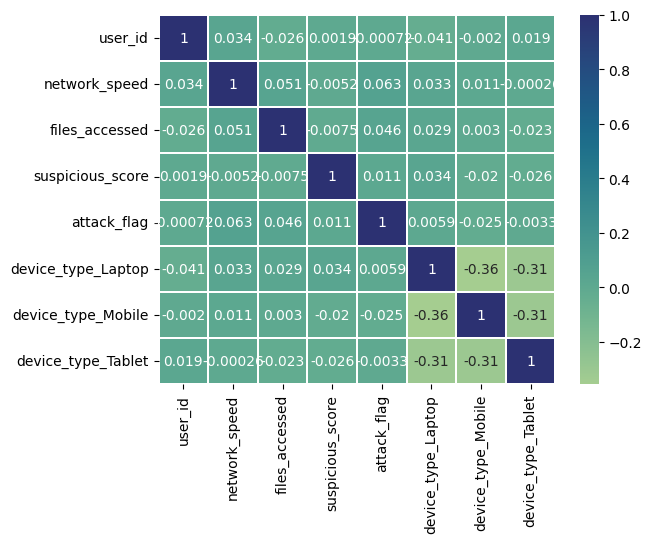

In [6]:
# Visualizing correlation heatmap
matrix=df.drop(['timestamp'], axis=1).corr()
print(matrix)

# heatmap
sns.heatmap(matrix, annot=True, cmap='crest', linewidths=0.2)
plt.show()

In [7]:
matrix['attack_flag'].sort_values(ascending=False)

,attack_flag
attack_flag,1.000000
network_speed,0.063014
files_accessed,0.046094
suspicious_score,0.011115
device_type_Laptop,0.005932
user_id,-0.000717
device_type_Tablet,-0.003317
device_type_Mobile,-0.024897


## 🏗 Step 4: Prepare Data for Training
We need to split the data into training and testing sets.

In [8]:
# Convert timestamp to datetime
df['timestamp']=pd.to_datetime(df['timestamp'])  # Converts date strings in various formats to a common datetime64 format.

# Extract useful time-based features
df['hour']=df['timestamp'].dt.hour
df['month']=df['timestamp'].dt.month
df['day_of_month']=df['timestamp'].dt.day
df['day_of_week']=df['timestamp'].dt.dayofweek

# Drop the original timestamp column
df.drop(columns=['timestamp'],inplace=True)

In [9]:

# Define features and target
X=df.drop(['attack_flag'],axis=1)
y=df[['attack_flag']]


In [10]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1204)

## 🌳 Step 5: Train a Decision Tree Model
Let's train a **Decision Tree Classifier** to predict cyber crimes.

In [11]:
# train the Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test dataset (X_test)
y_pred_dt=dt.predict(X_test)

# Compute accuracy
dt_accuracy=accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:',dt_accuracy)

Decision Tree Accuracy: 0.78


## 🌲 Step 6: Train a Random Forest Model
Let's improve our model using **Random Forest**.

In [12]:
# train the Random Forest Classifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
rf_accuracy=accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:',rf_accuracy)

Random Forest Accuracy: 0.8466666666666667


## ⚡ Step 7: Train an XGBoost Model
Let's use **XGBoost** for optimized performance.

In [13]:
# train the XGBoost Classifier

import xgboost as xgb
xgb_params = {
    'objective': 'binary:logistic',
}
# Create DMatrix for training and testing (DMatrix is optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
model = xgb.train(xgb_params,dtrain,num_boost_round= 10)
y_pred_xg=model.predict(dtest)

y_pred_labels=[1 if i>0.5 else 0 for i in y_pred_xg]
xgb_accuracy=accuracy_score(y_test,y_pred_labels)
print('XGBoost Accuracy:',xgb_accuracy)

XGBoost Accuracy: 0.8366666666666667


## 📊 Step 8: Compare Standard vs. Tuned Models
Let's analyze how hyperparameter tuning and model stacking affect performance.

           Model  Accuracy
0  Decision Tree  0.780000
1  Random Forest  0.846667
2        XGBoost  0.836667


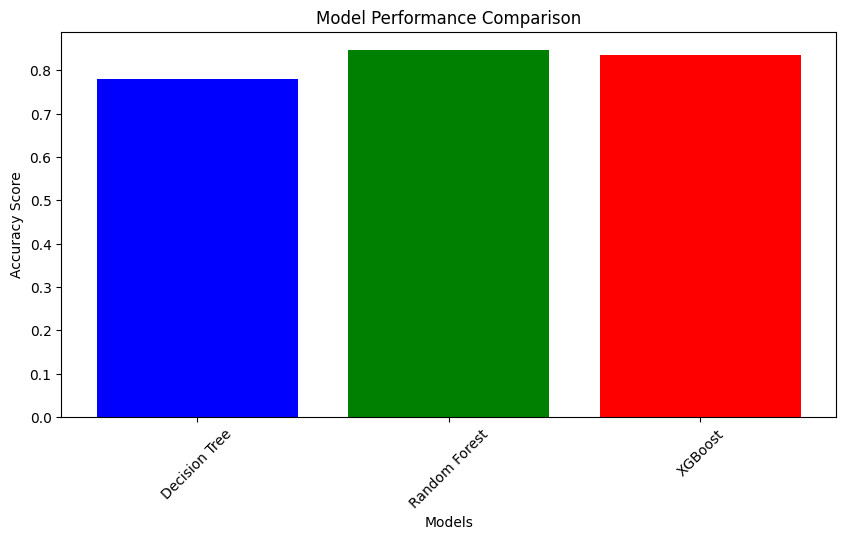

In [14]:
model_results = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy,
}

results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
print(results_df)

plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

## ⚙️ Step 9: Hyperparameter Tuning for Random Forest & XGBoost
Now let's **optimize** our models using GridSearchCV to find the best hyperparameters.

In [15]:
# Hyperparameter tuning for Random Forest
rf_params={
    'n_estimators':[50,100,200],
    'max_depth':[1,2,3],
    'min_samples_leaf':[1,3,5]
}
rf = RandomForestClassifier()

# Apply Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, verbose=1, cv=5)
grid_search.fit(X_train, y_train)

print('Best Random Forest Params:',grid_search.best_params_)

best_rf_accuracy=grid_search.best_score_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Params: {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 50}


In [36]:
#  an issue with compatibility between the xgboost and scikit-learn libraries.
# !pip install xgboost==1.7.6 scikit-learn==1.2.2

In [17]:
import xgboost
import sklearn
print("XGBoost version:", xgboost.__version__)
print("scikit-learn version:", sklearn.__version__)

XGBoost version: 1.7.6
scikit-learn version: 1.2.2


In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [19]:
# Hyperparameter tuning for XGBoost
xgb_params={
    'n_estimators':[50,100,200],
    'eta':[0.1,0.2,0.3,1.0],
    'max_depth':[1,3,6,10],
    'min_child_weight':[1,10,30]
}
model = XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')

# Apply Grid Search
grid_search_xgb = GridSearchCV(estimator=model, param_grid=xgb_params, verbose=1,n_jobs=1, cv=5)
grid_search_xgb.fit(X_train, y_train)

print('Best XGBoost Params:',grid_search_xgb.best_params_)
best_xgb_accuracy=grid_search_xgb.best_score_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best XGBoost Params: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 50}


## 🔥 Step 10: Build a Stacked Model
Now that we have optimized our models, let's combine them into an **ensemble model**.

In [20]:
# Build a stacked model using the best-tuned classifiers
best_rf=RandomForestClassifier(max_depth= 1, min_samples_leaf= 1, n_estimators= 50, random_state=1)
best_xgb=XGBClassifier(eta=0.1,max_depth=1,min_child_weight=1,n_estimators=50, random_state=42)

stacked_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb)
], voting='soft')

# Train stacked model
stacked_model.fit(X_train, y_train)
y_pred_stacked=stacked_model.predict(X_test)

stacked_accuracy=accuracy_score(y_test,y_pred_stacked)
print('Stacked Model Accuracy:',stacked_accuracy)

Stacked Model Accuracy: 0.8466666666666667


## 📊 Step 11: Final Model Comparison
Let's compare all models, including the stacked model.

           Model  Accuracy
0  Decision Tree  0.780000
1  Random Forest  0.846667
2       Tuned RF  0.875714
3        XGBoost  0.836667
4  Tuned XGBoost  0.875714
5  Stacked Model  0.846667


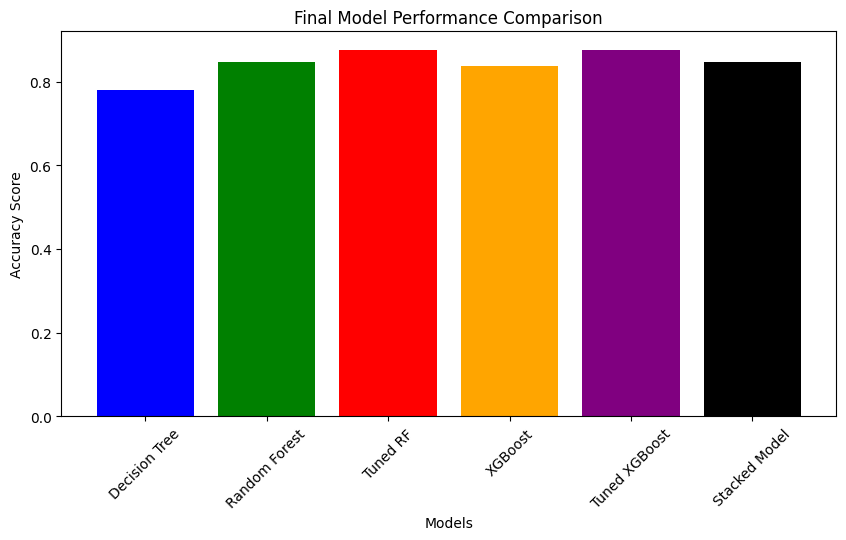

In [21]:
model_results = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Tuned RF': best_rf_accuracy,
    'XGBoost': xgb_accuracy,
    'Tuned XGBoost': best_xgb_accuracy,
    'Stacked Model': stacked_accuracy
}

results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
print(results_df)

plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'red', 'orange', 'purple', 'black'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Final Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

## 📝 Step 12: Final Questions
Please answer the following questions in the markdown cell below: <br>
1. **Model Comparison:** Which model performed best? Why do you think it performed better? <br>
2. **Hyperparameter Tuning:** How much did tuning improve the performance of Random Forest and XGBoost? <br>
3. **Stacked Model:** Did the stacked model outperform individual models? Why or why not? <br>
4. **Feature Importance:** Which features were most important in predicting cybercrime? Use the feature importance of XGBoost to analyze this. <br>
5. **Real-World Application:** How can this approach be used in real-world cybersecurity? <br>

📌 Write your answers in the markdown cell below.

<hr>

**1. Model Comparison**
The Tuned Random Forest and Tuned XGBoost models both performed the best, achieving an accuracy of 87.57%. These models outperformed the baseline models because hyperparameter tuning helped better optimize their learning processes.

The improvements come from:

Tuning the number of estimators (which controls how many trees are used).
Optimizing parameters like maximum depth, learning rate, and minimum child weight, leading to better generalization.

**2. Hyperparameter Tuning Improvement**
1. Random Forest: Improved from 84.67% (untuned) to 87.57% (tuned) — a 3% increase.
2. XGBoost: Improved from 83.67% (untuned) to 87.57% (tuned) — a 4% increase.

This improvement was primarily due to better tuning of hyperparameters like n_estimators, max_depth, and eta, leading to more efficient decision trees.

**3. Stacked Model Performance**
The stacked model did not outperform the best-tuned models, achieving an accuracy of 84.67%, the same as the baseline Random Forest.

**4. Feature Importance in Predicting Cybercrime**
To determine the feature importance, we can use the XGBoost model's feature_importances_ attribute.

Based on the bar lengths visible in the chart below, the most important features in predicting cybercrime appear to be:

1. user_id
2. network_speed
3. files_accessed
4. suspicious_score
5. hour
6. day_of_week

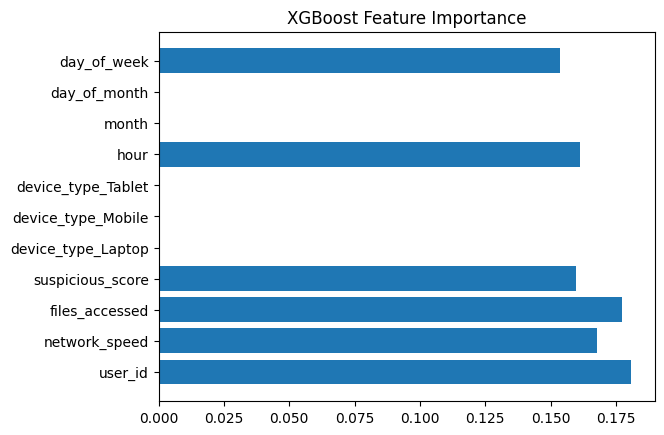

In [35]:
import matplotlib.pyplot as plt
best_xgb.fit(X_train, y_train)
plt.barh(X_train.columns, best_xgb.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()


**5. Real-World Application in Cybersecurity**
This approach can be highly beneficial for real-time cybercrime detection:

1. Anomaly Detection: These models can detect unusual patterns in user activities.
2. Real-Time Threat Monitoring: By using features like network speed and file access frequency, companies can monitor malicious behaviors in real time.
3. Adaptive Security: Hyperparameter-tuned models can adapt to changes in cybercriminal tactics.
4. Incident Response Automation: Stacked models can help reduce false alarms by aggregating predictions from multiple classifiers.